In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, load_iris, load_wine
from sklearn.cluster import KMeans
from sklearn.preprocessing import minmax_scale, StandardScaler
from sklearn.metrics import accuracy_score, r2_score, silhouette_score
from kneed import knee_locator, KneeLocator
from warnings import filterwarnings
filterwarnings(action='ignore')

In [2]:
df = make_blobs(n_samples=100, n_features=2, centers=3)
df

(array([[ 2.6064638 ,  3.08577251],
        [ 2.16742519,  2.81726672],
        [ 7.36694356, -7.10572134],
        [ 7.1544466 , -7.6040527 ],
        [ 5.93803171, -9.17578892],
        [ 1.3356053 ,  3.51044671],
        [ 3.39364933,  4.06013697],
        [ 5.05026662, -3.8310381 ],
        [ 6.08598634, -4.91043546],
        [ 4.50802453, -3.58278706],
        [ 6.51854964, -3.91076214],
        [ 7.60279495, -5.54950781],
        [ 4.77517163, -6.43199048],
        [ 2.08474755,  3.36176809],
        [ 5.86029139, -3.15839234],
        [ 5.10018772, -5.69201108],
        [ 1.91652635,  4.52831306],
        [ 5.55393707, -4.3798711 ],
        [ 1.19997682,  4.83181346],
        [ 4.67747343, -6.3652715 ],
        [ 2.73438816,  3.65466274],
        [ 5.68280125, -2.52509684],
        [ 7.13059284, -5.77870068],
        [ 1.25137282,  4.31756566],
        [ 2.76120979,  2.96457852],
        [ 2.79480816,  3.97009169],
        [ 7.58849546, -6.8427452 ],
        [ 6.43790465, -5.661

In [3]:
type(df)

tuple

In [4]:
df[1]

array([2, 2, 1, 0, 0, 2, 2, 1, 1, 1, 1, 0, 0, 2, 1, 0, 2, 1, 2, 0, 2, 1,
       1, 2, 2, 2, 0, 0, 2, 0, 2, 1, 0, 2, 0, 2, 2, 2, 2, 0, 1, 0, 2, 2,
       0, 1, 0, 1, 1, 2, 0, 0, 2, 1, 1, 1, 0, 0, 2, 0, 2, 1, 1, 2, 1, 2,
       0, 1, 1, 1, 1, 1, 2, 2, 0, 1, 1, 0, 2, 1, 2, 0, 2, 1, 0, 0, 2, 0,
       2, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1])

In [5]:
df[0][:,0]

array([ 2.6064638 ,  2.16742519,  7.36694356,  7.1544466 ,  5.93803171,
        1.3356053 ,  3.39364933,  5.05026662,  6.08598634,  4.50802453,
        6.51854964,  7.60279495,  4.77517163,  2.08474755,  5.86029139,
        5.10018772,  1.91652635,  5.55393707,  1.19997682,  4.67747343,
        2.73438816,  5.68280125,  7.13059284,  1.25137282,  2.76120979,
        2.79480816,  7.58849546,  6.43790465,  1.81863187,  6.68044951,
        1.09673821,  4.35683339,  5.25910962,  0.36859004,  4.7568905 ,
        1.9792647 ,  1.33403873,  3.00572609,  3.78420579,  6.38255974,
        5.26402013,  8.6422967 ,  0.22303532,  2.71544299,  5.35966899,
        6.12523604,  6.12517701,  5.53542605,  4.58009121,  1.00940732,
        5.34834699,  8.01832837,  1.1102917 ,  5.74872183,  6.79480533,
        4.72856675,  7.91479376,  5.04236376,  2.06798075,  7.54034511,
       -0.67693832,  6.09303102,  6.96469639,  1.80284618,  4.8864935 ,
       -0.17580969,  5.70572653,  4.63832359,  6.23396463,  5.67

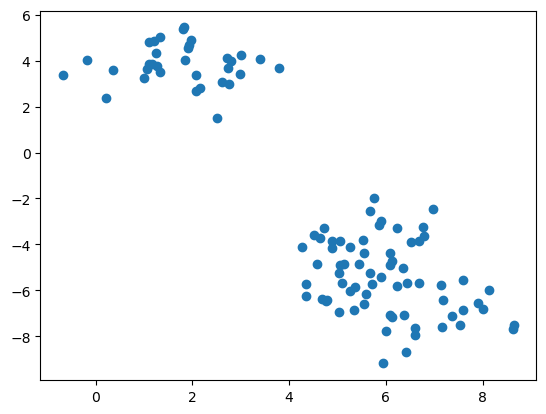

In [6]:
plt.scatter(x=df[0][:,0], y=df[0][:,1])
plt.show()

In [7]:
silhouette_score(df[0], df[1])

0.49605592596440906

In [8]:
iris = load_iris()
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [9]:
iris['data']

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [10]:
wine = load_wine()
wine.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])

In [11]:
wine['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [12]:
wine['feature_names']

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [13]:
airlines = pd.read_csv("E:/Python Programs/Invistico_Airline.csv")
airlines.head()

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,...,4,2,2,0,2,4,2,5,0,0.0


In [14]:
airlines.shape

(129880, 23)

In [15]:
airlines.columns

Index(['satisfaction', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Seat comfort',
       'Departure/Arrival time convenient', 'Food and drink', 'Gate location',
       'Inflight wifi service', 'Inflight entertainment', 'Online support',
       'Ease of Online booking', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding',
       'Departure Delay in Minutes', 'Arrival Delay in Minutes'],
      dtype='object')

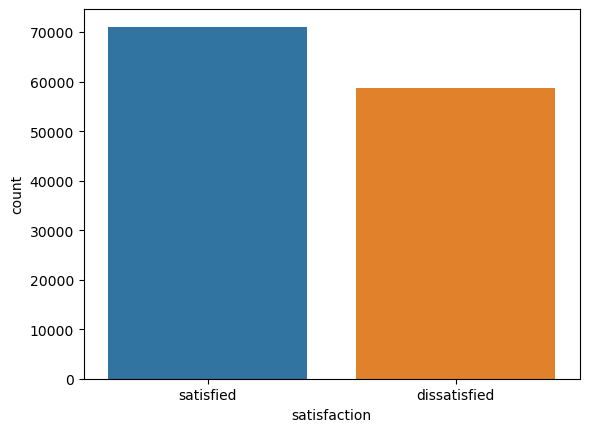

In [16]:
sns.countplot(x='satisfaction', data=airlines)
plt.show()

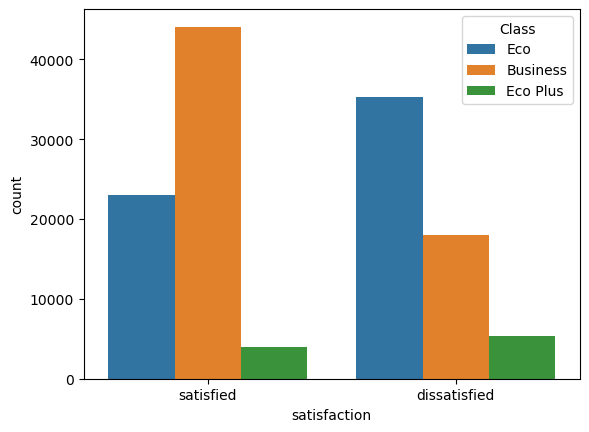

In [17]:
sns.countplot(x='satisfaction', data=airlines, hue='Class')
plt.show()

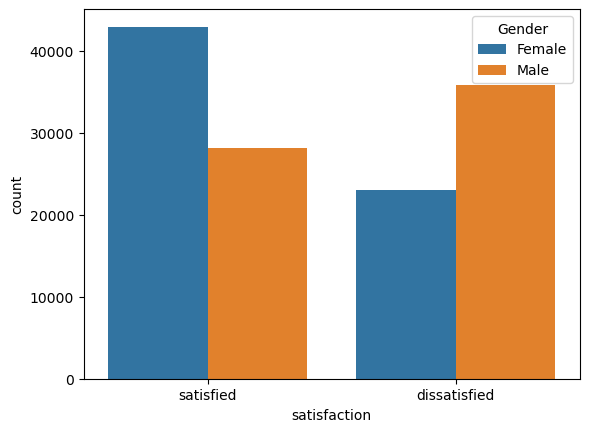

In [18]:
sns.countplot(x='satisfaction', data=airlines, hue='Gender')
plt.show()

In [19]:
ratings = airlines.loc[:,"Seat comfort":"Online boarding"]
ratings.head()

,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding
0,0,0,0,2,2,4,2,3,3,0,3,5,3,2
1,0,0,0,3,0,2,2,3,4,4,4,2,3,2
2,0,0,0,3,2,0,2,2,3,3,4,4,4,2
3,0,0,0,3,3,4,3,1,1,0,1,4,1,3
4,0,0,0,3,4,3,4,2,2,0,2,4,2,5


In [20]:
ratings.describe()

,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000
mean,2.838597,2.990645,2.851994,2.990422,3.249130,3.383477,3.519703,3.472105,3.465075,3.485902,3.695673,3.340807,3.705759,3.352587
std,1.392983,1.527224,1.443729,1.305970,1.318818,1.346059,1.306511,1.305560,1.270836,1.292226,1.156483,1.260582,1.151774,1.298715
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000
50%,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000
75%,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,4.000000,5.000000,5.000000,4.000000,5.000000,4.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [21]:
# Applying Z-Score Normalization will give you a Numpy array.

scaling = StandardScaler()
ratings_scaled = scaling.fit_transform(ratings)
ratings_scaled

array([[-2.03779055, -1.9582301 , -1.97544301, ...,  1.31621673,
        -0.61276078, -1.04148541],
       [-2.03779055, -1.9582301 , -1.97544301, ..., -1.06364501,
        -0.61276078, -1.04148541],
       [-2.03779055, -1.9582301 , -1.97544301, ...,  0.52292948,
         0.25546851, -1.04148541],
       ...,
       [ 0.11586891, -1.9582301 ,  0.10251673, ..., -1.06364501,
        -0.61276078, -1.04148541],
       [ 0.11586891, -0.64865978,  0.10251673, ..., -1.06364501,
        -2.34921937, -1.04148541],
       [ 0.11586891,  0.66091053,  0.10251673, ..., -0.27035777,
        -0.61276078, -0.27149028]])

In [22]:
# Converting Z-Score Normalization data to a DataFrame

ratings_scaled_pd = pd.DataFrame(scaling.fit_transform(ratings), columns = ratings.columns)
ratings_scaled_pd.describe()

,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding
count,1.298800e+05,1.298800e+05,1.298800e+05,1.298800e+05,1.298800e+05,129880.000000,1.298800e+05,1.298800e+05,1.298800e+05,1.298800e+05,1.298800e+05,1.298800e+05,1.298800e+05,1.298800e+05
mean,6.652448e-17,-1.668583e-16,-4.201546e-17,-5.941249e-17,-5.602062e-17,0.000000,1.820670e-16,1.680618e-16,-1.680618e-16,-4.201546e-17,-2.520928e-16,-5.251933e-17,1.190438e-16,-1.260464e-16
std,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00
min,-2.037791e+00,-1.958230e+00,-1.975443e+00,-2.289818e+00,-2.463679e+00,-2.513627,-2.693982e+00,-2.659487e+00,-2.726622e+00,-2.697605e+00,-2.330931e+00,-2.650220e+00,-3.217449e+00,-2.581476e+00
25%,-6.020176e-01,-6.486598e-01,-5.901365e-01,-7.583833e-01,-9.471627e-01,-1.027802,-3.977808e-01,-1.127571e+00,-3.659618e-01,-1.149883e+00,-6.015440e-01,-2.703578e-01,-6.127608e-01,-1.041485e+00
50%,1.158689e-01,6.125377e-03,1.025167e-01,7.334096e-03,-1.889048e-01,0.458022,3.676197e-01,4.043454e-01,4.209251e-01,3.978403e-01,2.631497e-01,-2.703578e-01,2.554685e-01,4.985049e-01
75%,8.337554e-01,6.609105e-01,7.951700e-01,7.730515e-01,5.693532e-01,0.458022,1.133020e+00,1.170303e+00,4.209251e-01,1.171702e+00,1.127843e+00,5.229295e-01,1.123698e+00,4.985049e-01
max,1.551642e+00,1.315696e+00,1.487823e+00,1.538769e+00,1.327611e+00,1.200935,1.133020e+00,1.170303e+00,1.207812e+00,1.171702e+00,1.127843e+00,1.316217e+00,1.123698e+00,1.268500e+00


In [23]:
inertia = []
for k in range(2,11):
    model = KMeans(n_clusters=k)
    model.fit(ratings_scaled_pd)
    inertia.append(model.inertia_)

print(inertia)

[1457533.1909835888, 1285508.556173163, 1171821.1923630366, 1114425.814112093, 1066831.5938027443, 1020860.2862286194, 986479.089496983, 957720.9212738547, 934567.0679571533]


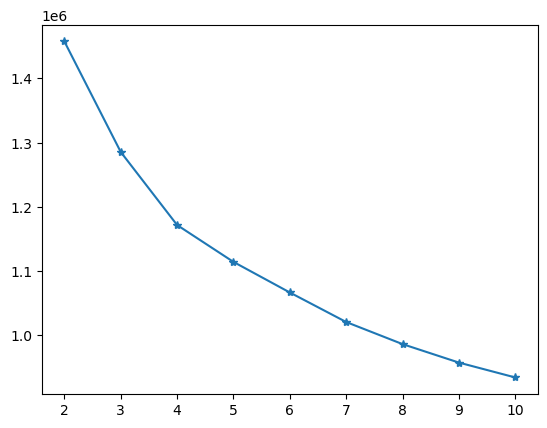

In [24]:
plt.plot(range(2,11), inertia, marker="*")
plt.show()

In [25]:
kd = KneeLocator(x=range(2,11), y=inertia, curve="convex", direction="decreasing")
kd.elbow

4

In [26]:
model = KMeans(n_clusters=4)
model.fit(ratings_scaled_pd)
clusters = model.predict(ratings_scaled_pd)

In [27]:
np.unique(clusters, return_counts=True)

(array([0, 1, 2, 3]), array([41358, 30166, 29624, 28732], dtype=int64))

In [28]:
airlines[clusters==0]

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
1293,satisfied,Female,Loyal Customer,63,Personal Travel,Eco,729,4,0,4,...,4,5,5,4,2,4,5,4,0,0.0
1302,satisfied,Female,Loyal Customer,33,Personal Travel,Eco Plus,2133,4,0,4,...,4,4,4,5,5,4,5,4,0,0.0
1304,satisfied,Female,Loyal Customer,27,Personal Travel,Eco,2543,4,0,4,...,5,5,5,4,5,4,5,3,0,0.0
1305,satisfied,Female,Loyal Customer,53,Personal Travel,Eco,648,4,0,4,...,5,4,4,4,5,3,4,4,0,0.0
1353,satisfied,Female,Loyal Customer,27,Personal Travel,Eco,1832,4,1,4,...,4,5,5,4,5,3,5,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129871,satisfied,Female,disloyal Customer,35,Personal Travel,Eco,3287,5,4,5,...,2,2,4,5,4,4,3,2,9,0.0
129872,satisfied,Female,disloyal Customer,69,Personal Travel,Eco,2240,5,4,5,...,4,4,5,4,4,3,4,4,4,0.0
129873,satisfied,Female,disloyal Customer,63,Personal Travel,Eco,1942,5,5,4,...,3,3,5,2,5,3,5,3,7,NaN
129874,satisfied,Female,disloyal Customer,11,Personal Travel,Eco,2752,5,5,5,...,2,2,3,5,3,5,4,2,5,0.0


In [29]:
# shape is (4,14) which means there are 4 clusters and 14 features

model.cluster_centers_

array([[ 0.86869209,  0.64076476,  0.77131254,  0.63510641,  0.34649579,
         0.55493187,  0.45459574,  0.60400988,  0.49056735,  0.41506096,
         0.47248908,  0.29290439,  0.47509317,  0.43998649],
       [-0.10756138, -0.14346038, -0.06302535, -0.02829661,  0.22262827,
        -0.05670134,  0.10216274, -0.35302604, -0.9707876 , -0.79643337,
        -1.08240093, -0.46663394, -1.09667817,  0.09952526],
       [-0.79251581, -0.75492236, -0.84904894, -0.85986235,  0.39167843,
         0.0793099 ,  0.49810885,  0.64512377,  0.50529795,  0.4013129 ,
         0.48569036,  0.32248654,  0.49174968,  0.50424624],
       [-0.31940299,  0.00728703, -0.16777875,  0.00283254, -1.13565233,
        -0.82038517, -1.27450199, -1.16354109, -0.20829425, -0.17536145,
        -0.04501417, -0.26431436, -0.04003207, -1.25705298]])

In [30]:
model.cluster_centers_.shape

(4, 14)

In [31]:
# Converting cluster centers into a dataframe

centers = pd.DataFrame(model.cluster_centers_, columns=ratings.columns)
centers

,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding
0,0.868692,0.640765,0.771313,0.635106,0.346496,0.554932,0.454596,0.604010,0.490567,0.415061,0.472489,0.292904,0.475093,0.439986
1,-0.107561,-0.143460,-0.063025,-0.028297,0.222628,-0.056701,0.102163,-0.353026,-0.970788,-0.796433,-1.082401,-0.466634,-1.096678,0.099525
2,-0.792516,-0.754922,-0.849049,-0.859862,0.391678,0.079310,0.498109,0.645124,0.505298,0.401313,0.485690,0.322487,0.491750,0.504246
3,-0.319403,0.007287,-0.167779,0.002833,-1.135652,-0.820385,-1.274502,-1.163541,-0.208294,-0.175361,-0.045014,-0.264314,-0.040032,-1.257053


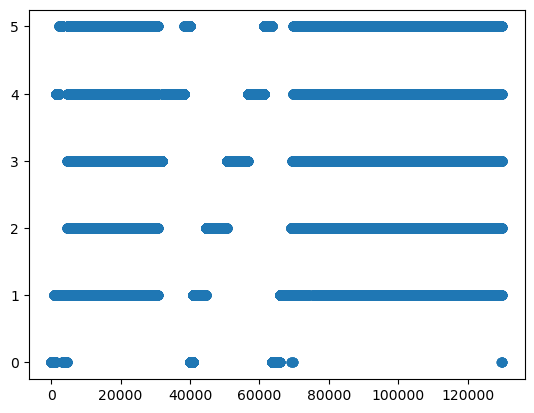

In [32]:
plt.plot("Seat comfort", data=ratings, marker='o', ls='')
plt.show()

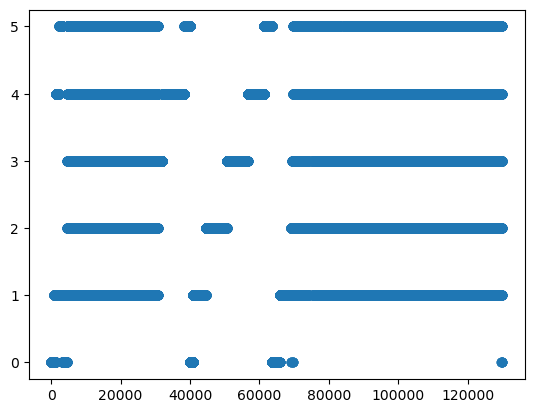

In [33]:
plt.plot("Seat comfort", data=ratings.sample(129880), marker='o', ls='')
plt.show()

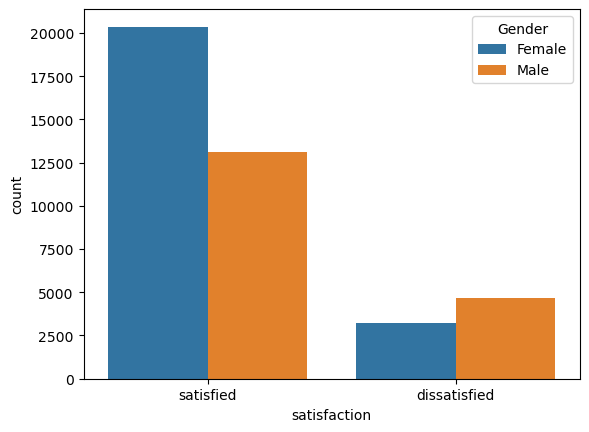

In [34]:
sns.countplot(x='satisfaction', data=airlines[clusters==0], hue='Gender')
plt.show()

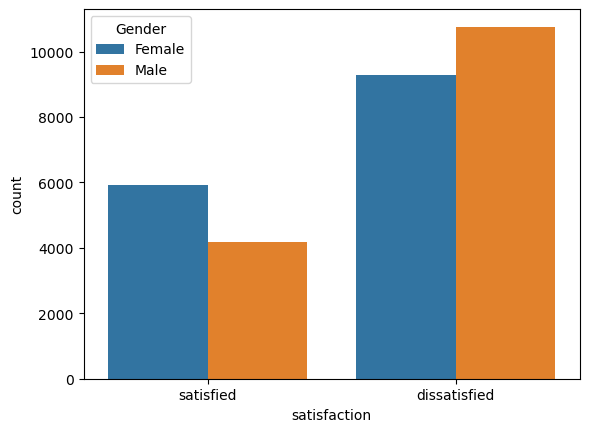

In [35]:
sns.countplot(x='satisfaction', data=airlines[clusters==1], hue='Gender')
plt.show()

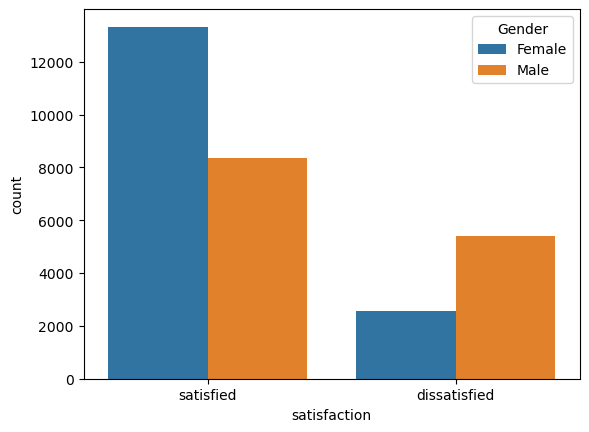

In [36]:
sns.countplot(x='satisfaction', data=airlines[clusters==2], hue='Gender')
plt.show()

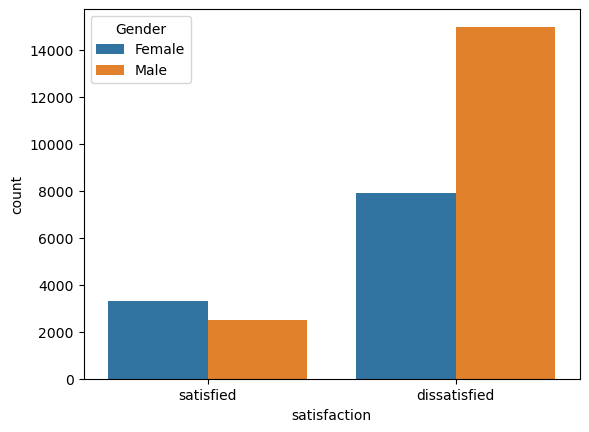

In [37]:
sns.countplot(x='satisfaction', data=airlines[clusters==3], hue='Gender')
plt.show()

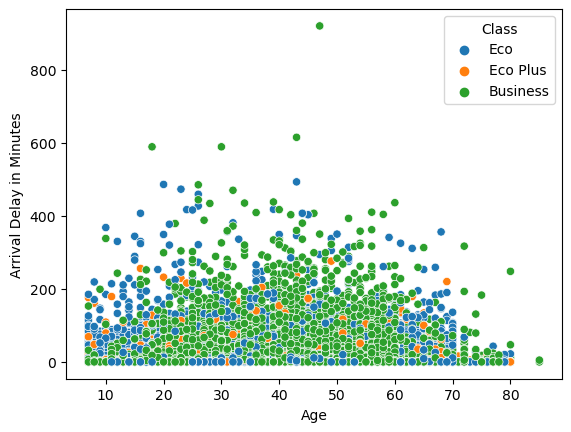

In [38]:
sns.scatterplot(x="Age", y="Arrival Delay in Minutes", data=airlines[clusters==0], hue="Class")
plt.show()

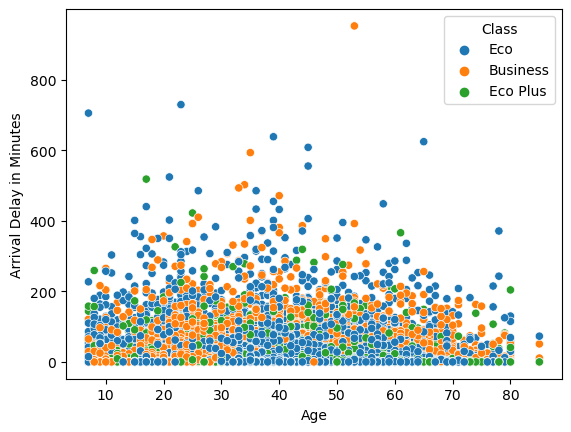

In [39]:
sns.scatterplot(x="Age", y="Arrival Delay in Minutes", data=airlines[clusters==1], hue="Class")
plt.show()

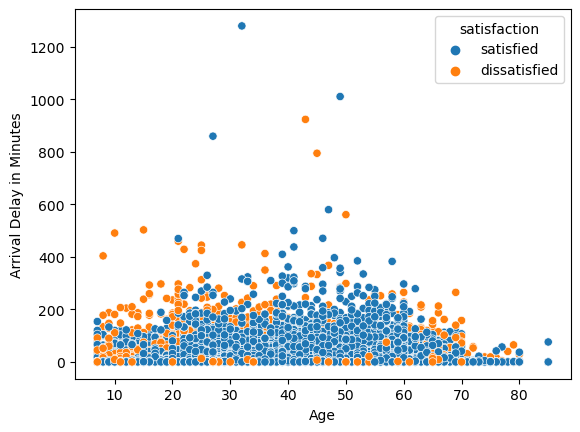

In [40]:
sns.scatterplot(x="Age", y="Arrival Delay in Minutes", data=airlines[clusters==2], hue="satisfaction")
plt.show()

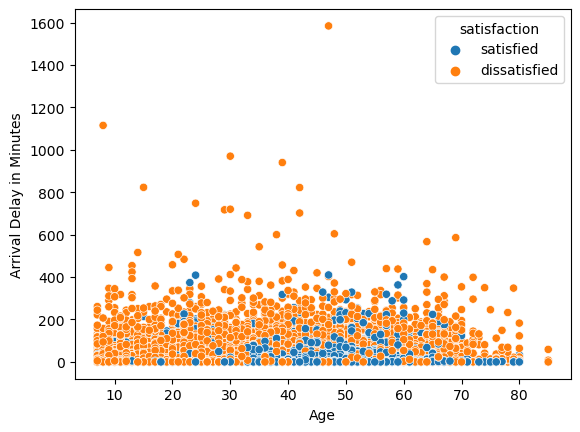

In [41]:
sns.scatterplot(x="Age", y="Arrival Delay in Minutes", data=airlines[clusters==3], hue="satisfaction")
plt.show()

In [42]:
centers.iloc[0:1,:]

,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding
0,0.868692,0.640765,0.771313,0.635106,0.346496,0.554932,0.454596,0.60401,0.490567,0.415061,0.472489,0.292904,0.475093,0.439986


In [43]:
centers.iloc[0]

Seat comfort                         0.868692
Departure/Arrival time convenient    0.640765
Food and drink                       0.771313
Gate location                        0.635106
Inflight wifi service                0.346496
Inflight entertainment               0.554932
Online support                       0.454596
Ease of Online booking               0.604010
On-board service                     0.490567
Leg room service                     0.415061
Baggage handling                     0.472489
Checkin service                      0.292904
Cleanliness                          0.475093
Online boarding                      0.439986
Name: 0, dtype: float64

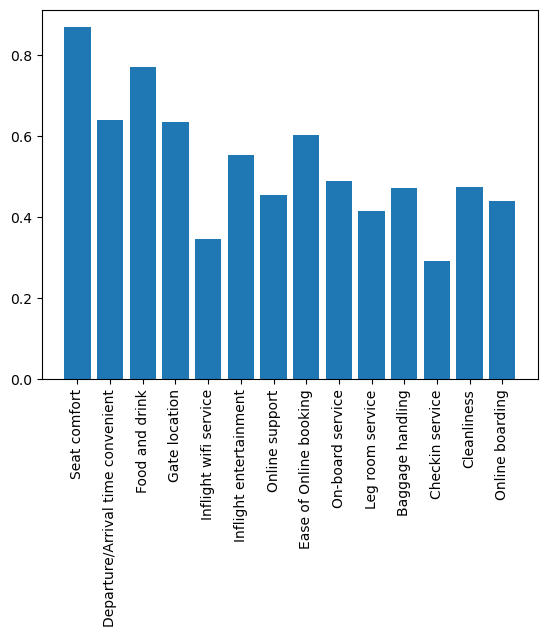

In [44]:
plt.bar(x=centers.columns,height=centers.iloc[0])
plt.xticks(rotation=90)
plt.show()

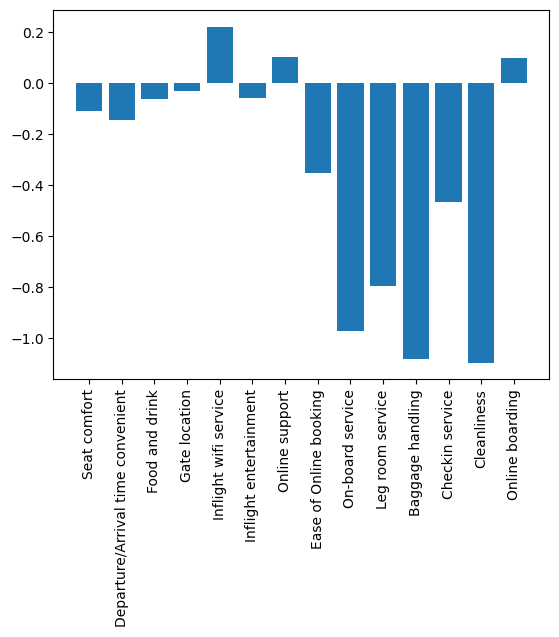

In [45]:
plt.bar(x=centers.columns,height=centers.iloc[1])
plt.xticks(rotation=90)
plt.show()

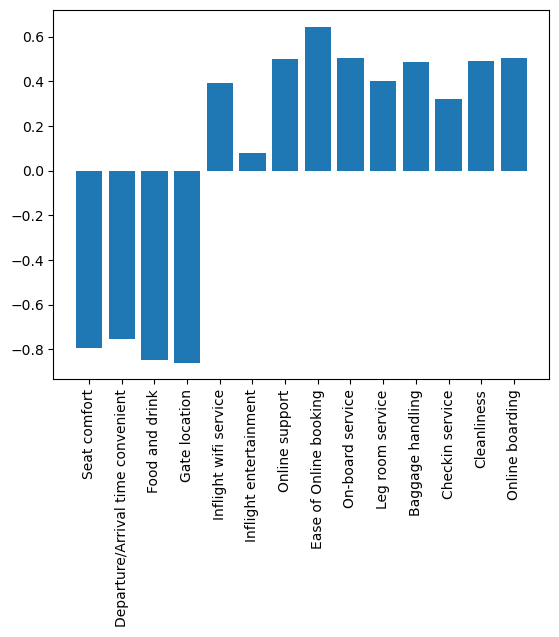

In [46]:
plt.bar(x=centers.columns,height=centers.iloc[2])
plt.xticks(rotation=90)
plt.show()

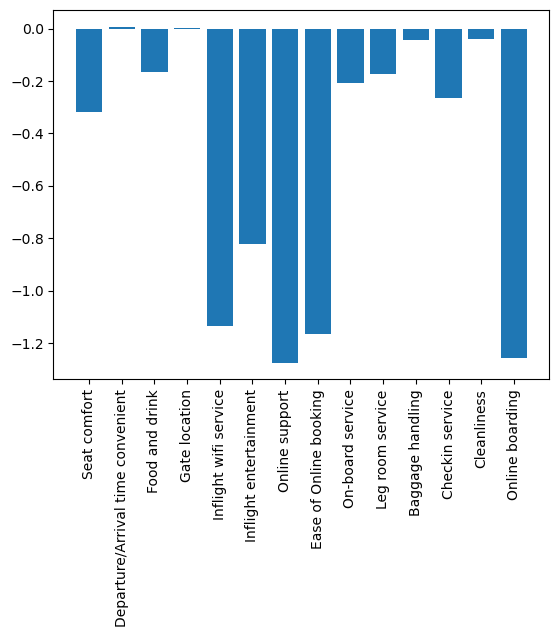

In [47]:
plt.bar(x=centers.columns,height=centers.iloc[3])
plt.xticks(rotation=90)
plt.show()

In [48]:
airlines[clusters==0].groupby("Gender").describe()["Age"]

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
Female,23573.0,40.524032,15.155640,7.0,29.0,42.0,52.0,85.0
Male,17785.0,41.119708,13.849048,7.0,31.0,42.0,52.0,85.0


In [49]:
airlines[(clusters==0) & (airlines.satisfaction=="dissatisfied")].groupby("Gender").describe()["Food and drink"]

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
Female,3215.0,3.826128,0.732779,0.0,3.0,4.0,4.0,5.0
Male,4680.0,3.536538,0.802293,0.0,3.0,3.0,4.0,5.0


In [50]:
airlines[(clusters==1) & (airlines.satisfaction=="satisfied")].groupby("Gender").describe()["Food and drink"]

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
Female,5925.0,2.686245,1.635493,0.0,1.0,3.0,4.0,5.0
Male,4190.0,2.769212,1.551213,0.0,2.0,3.0,4.0,5.0


In [51]:
airlines[(clusters==2) & (airlines.satisfaction=="satisfied")].groupby("Gender").describe()["Age"]

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
Female,13323.0,41.803047,14.858748,7.0,31.0,43.0,53.0,85.0
Male,8353.0,43.349934,11.780368,7.0,36.0,44.0,52.0,85.0


In [52]:
airlines[(clusters==3) & (airlines.satisfaction=="satisfied")].groupby("Gender").describe()["Age"]

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
Female,3322.0,34.624323,15.437094,7.0,23.0,31.0,46.0,80.0
Male,2511.0,34.562326,14.506407,7.0,23.0,31.0,45.0,80.0
